## Model loader for water level forecasting

In [1]:
from tensorflow.keras.models import load_model
import numpy as np

In [2]:
# load a model

model1 = load_model('UtokNoi/')

In [3]:
# input data shape as list
data_sequence = [2, 2, 2, 2, 2]
# convert to sequence array shape
sequence_arr = np.array(data_sequence).reshape(1, 5, 1)

In [6]:
# model prediction
predict = model1.predict(sequence_arr)
# ceiling up prediction values in range(1, 4)
predict_val = np.ceil(predict.flatten())
# convert numpy arr to integer value

predict_val.astype(np.int16)[0]

1/1 [==============================] - 0s 19ms/step


2

In [11]:
from typing import List
def Forecasting(model_folder : str, data_input : List) -> int:
    model = load_model(model_folder)
    data_sequence = np.array(data_input).reshape(1, 5, 1)
    predict = model.predict(data_sequence).flatten()
    return predict[0]
    # return np.ceil(predict).astype(np.int16)[0]
    

In [8]:
Forecasting(model_folder='UtokNoi/',
           data_input=[2, 2, 2, 2, 2])

1/1 [==============================] - 1s 557ms/step


2

In [9]:
def week_forecast(model_folder : str, data_input : List) -> List:
    forecast = []
    current_sequence = data_input
    for i in range(7):
        next_value = Forecasting(model_folder, current_sequence)
        current_sequence.append(next_value)
        forecast.append(next_value)
        current_sequence = current_sequence[1:]
        #print(current_sequence)
    return forecast

In [12]:
week_forecast(model_folder='UtokNoi/',
           data_input=[1, 3, 1, 2, 3])

1/1 [==============================] - 1s 563ms/step


[2.3309495, 2.1614516, 2.1506855, 2.0171783, 2.0102713, 1.9743226, 1.957958]

## Prediction results with Forecasting LSTMs
- พี่พยายามจูนให้สุด ๆ ล่ะแต่ได้แค่นี้เพราะว่า data เรา create ขึันมามันไม่ได้มี sequence ที่แน่นอนน่ะ loss ประมาณ 0.7 ได้
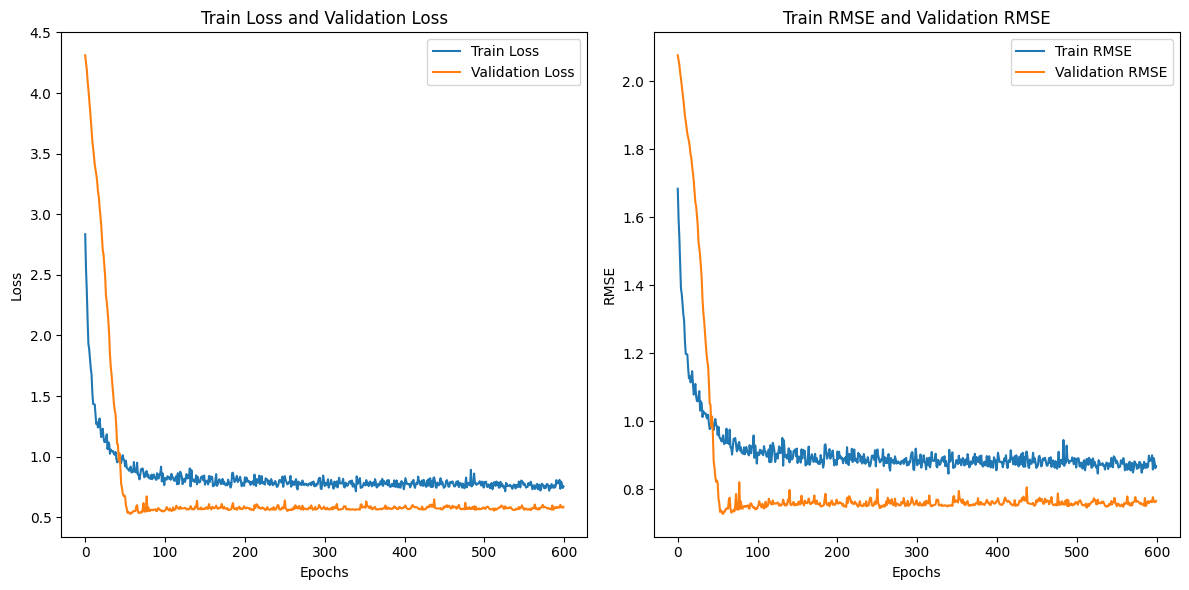
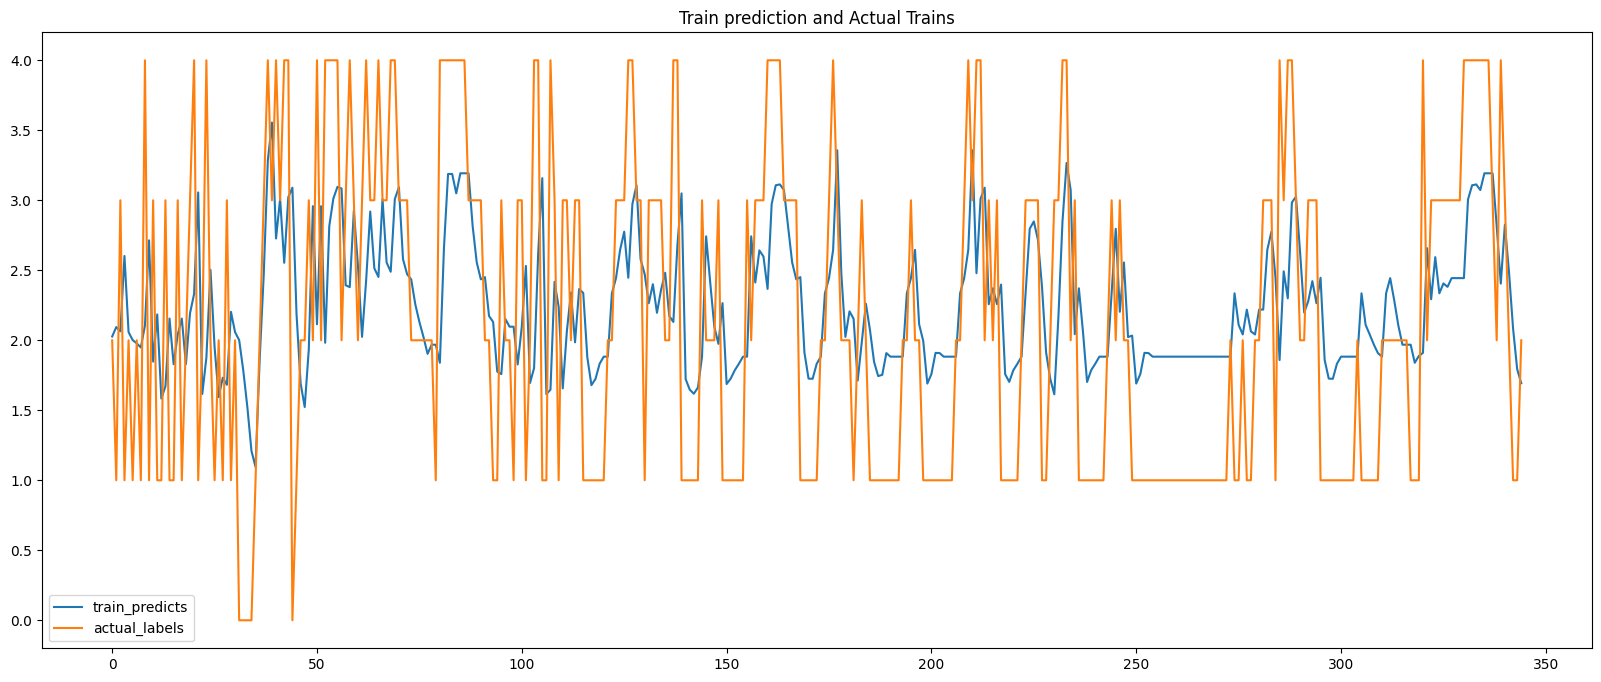
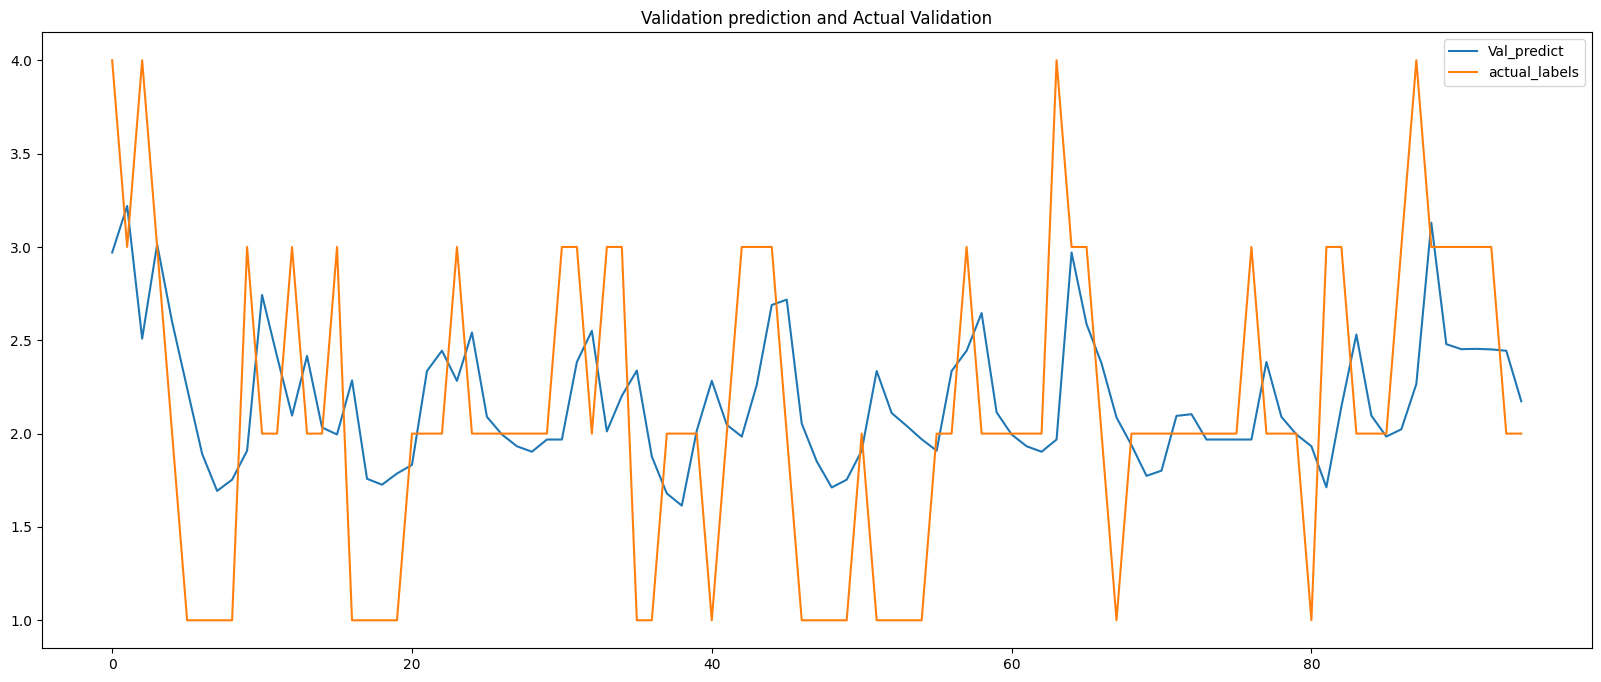
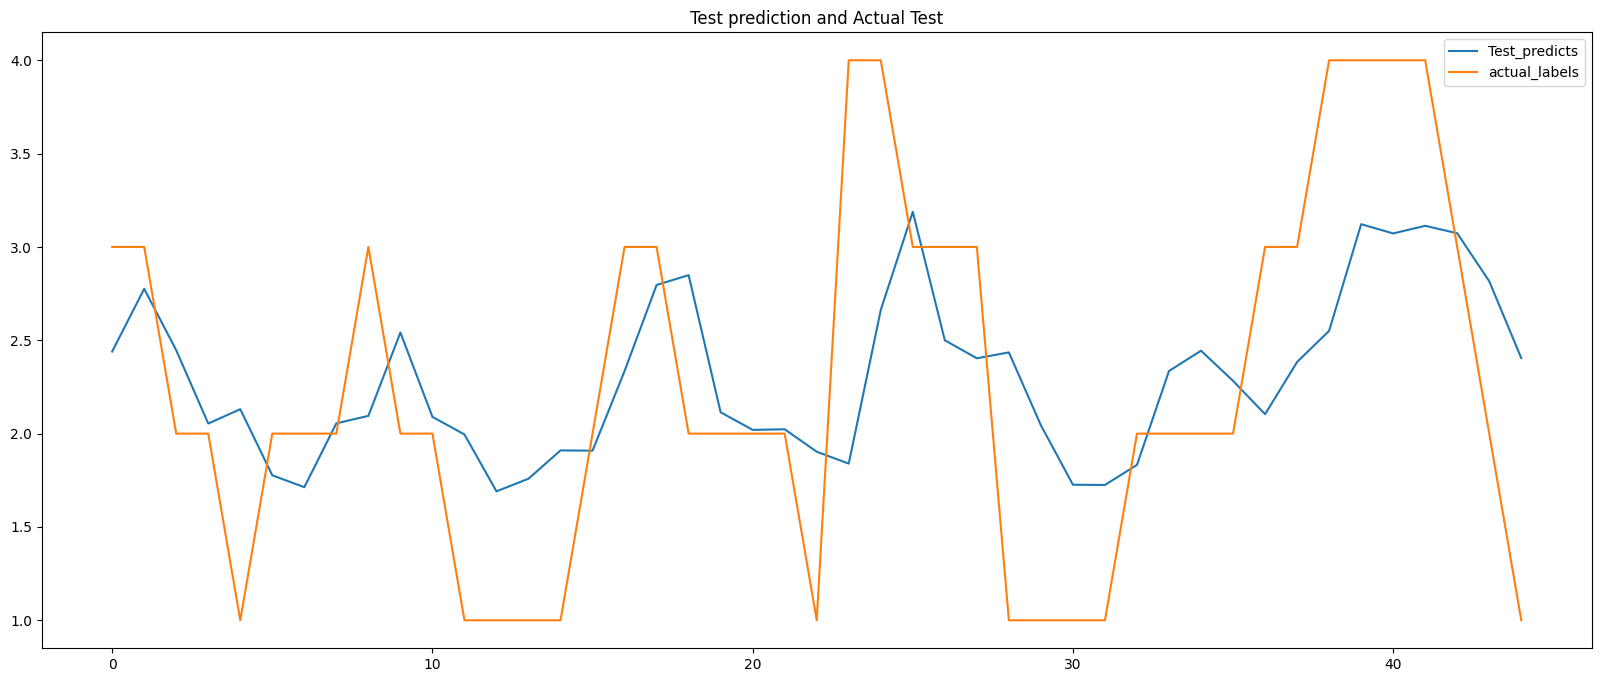